In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/Recruitment_Data_updated.csv')

In [ ]:
df.shape

(35712, 4)

In [ ]:
df.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source
0,0.000707,2.976686,0.604739,Applied Online
1,-0.019452,2.989157,0.396567,NaN
2,-0.009998,2.993355,0.206242,Applied Online
3,-0.003004,1.989966,-0.475037,NaN
4,-0.025405,3.016559,0.345470,Campus


In [ ]:
df2=df.drop_duplicates()

In [ ]:
df2.shape

(35712, 4)

In [ ]:
df2.isna().sum()


,0
attrition,0
performance_rating,1
sales_quota_pct,1
recruiting_source,16351


In [ ]:
df2.dropna(inplace=True)

In [ ]:
print('data has {} rows and {} columns'.format(df2.shape[0], df2.shape[1]))

data has 19361 rows and 4 columns


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19361 entries, 0 to 35710
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   attrition           19361 non-null  float64
 1   performance_rating  19361 non-null  float64
 2   sales_quota_pct     19361 non-null  float64
 3   recruiting_source   19361 non-null  object 
dtypes: float64(3), object(1)
memory usage: 756.3+ KB


In [ ]:
df_groupby_sales = df2.groupby('recruiting_source')[['sales_quota_pct']].mean().sort_values(by='sales_quota_pct', ascending=False)
df_groupby_sales

,sales_quota_pct
recruiting_source,
Search Firm,1.083475
Applied Online,1.080585
Campus,1.077981
Referral,1.062955


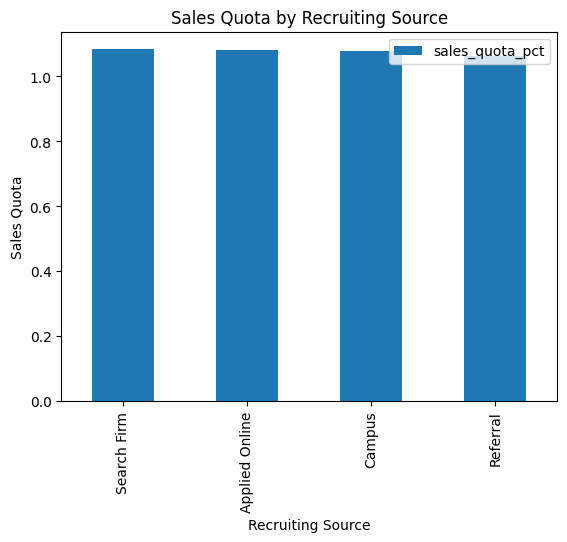

In [ ]:
df_groupby_sales.plot(kind='bar')
plt.ylabel('Sales Quota')
plt.xlabel('Recruiting Source')
plt.title('Sales Quota by Recruiting Source')
plt.show()

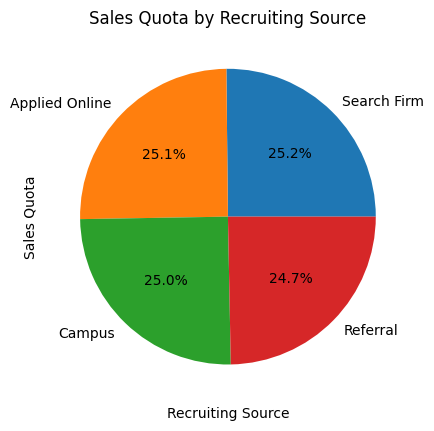

In [ ]:
df_groupby_sales.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend= False)
plt.ylabel('Sales Quota')
plt.xlabel('Recruiting Source')
plt.title('Sales Quota by Recruiting Source')
plt.show()

In [ ]:
df_groupby_performance_rating = df2.groupby('recruiting_source')[['performance_rating']].mean().sort_values(by='performance_rating', ascending=False)
df_groupby_performance_rating

,performance_rating
recruiting_source,
Referral,2.907138
Search Firm,2.905823
Applied Online,2.889649
Campus,2.888729


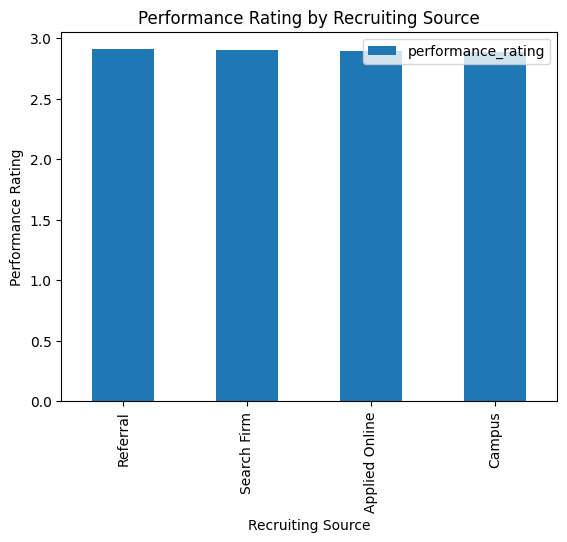

In [ ]:
df_groupby_performance_rating.plot(kind='bar')
plt.ylabel('Performance Rating')
plt.xlabel('Recruiting Source')
plt.title('Performance Rating by Recruiting Source')
plt.show()


Text(0.5, 1.0, 'Performance Rating by Recruiting Source')

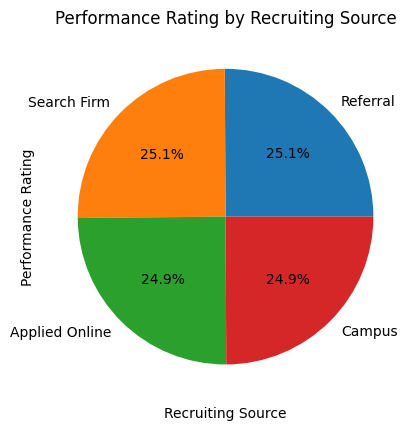

In [ ]:

df_groupby_performance_rating.plot(kind='pie', subplots=True,autopct='%1.1f%%',legend= False)
plt.ylabel('Performance Rating')
plt.xlabel('Recruiting Source')
plt.title('Performance Rating by Recruiting Source')

In [ ]:
df_groupby_attrition = df2.groupby('recruiting_source')[['attrition']].mean().sort_values(by='attrition', ascending=False)
df_groupby_attrition

,attrition
recruiting_source,
Referral,0.219701
Campus,0.218035
Applied Online,0.209860
Search Firm,0.197775


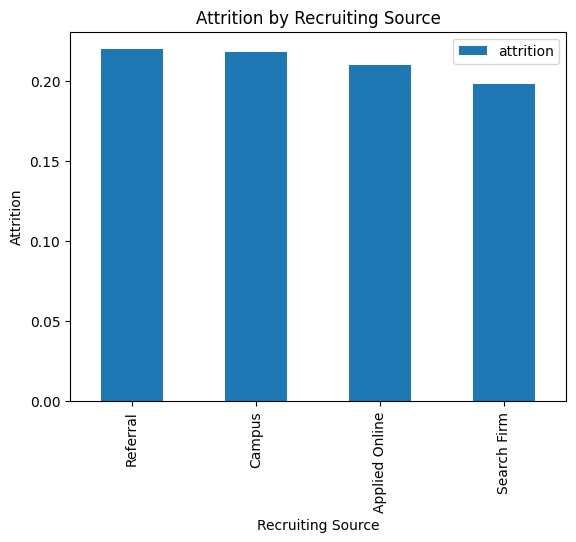

In [ ]:
df_groupby_attrition.plot(kind='bar')
plt.ylabel('Attrition')
plt.xlabel('Recruiting Source')
plt.title('Attrition by Recruiting Source')
plt.show()

Text(0.5, 1.0, 'Attrition by Recruiting Source')

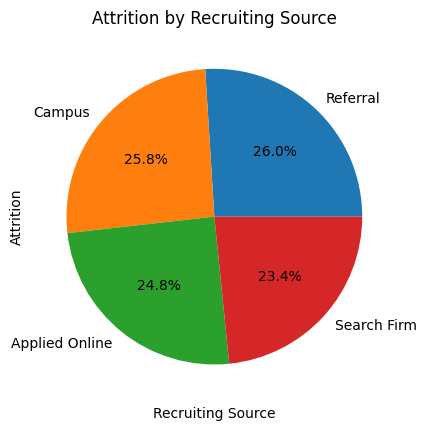

In [ ]:
df_groupby_attrition.plot(kind='pie',subplots=True, autopct='%1.1f%%',legend= False)
plt.ylabel('Attrition')
plt.xlabel('Recruiting Source')
plt.title('Attrition by Recruiting Source')

In [ ]:
df2.to_csv('Recruitment_Data_cleaned_updated.csv')


In [ ]:
!ls


Recruitment_Data_cleaned_updated.csv  Recruitment_Data_updated.csv  sample_data


# Visulaization using GGPLOT

In [ ]:
from plotnine.data import economics
from plotnine import ggplot, aes, geom_line,geom_bar,geom_point,geom_histogram,geom_boxplot,geom_col,ggtitle

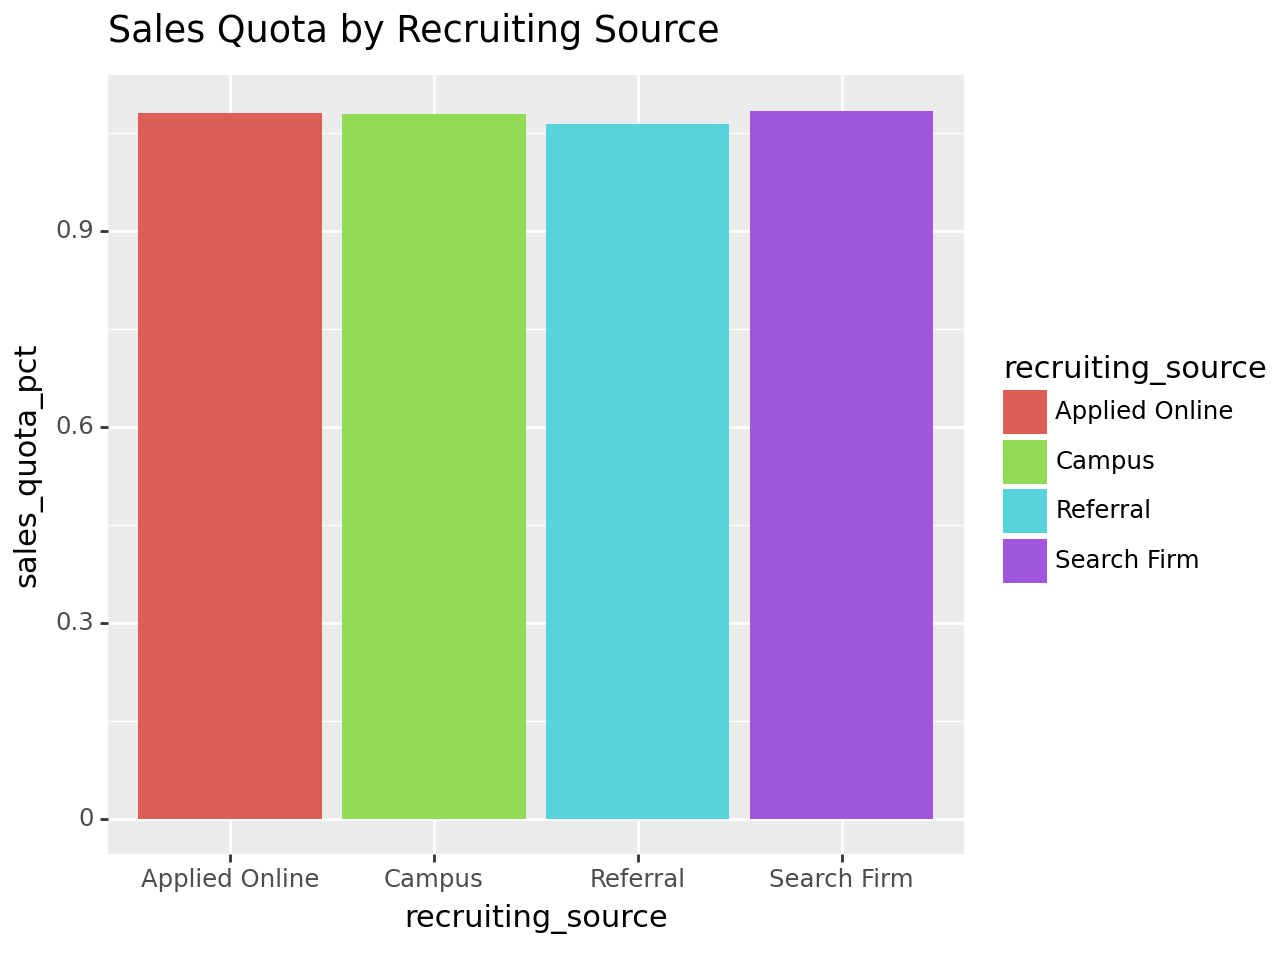

<Figure Size: (640 x 480)>

In [ ]:



(
    ggplot(df_groupby_sales.reset_index())
    + aes(x='recruiting_source', y='sales_quota_pct', fill='recruiting_source')
    + geom_col()
    + ggtitle('Sales Quota by Recruiting Source')

)


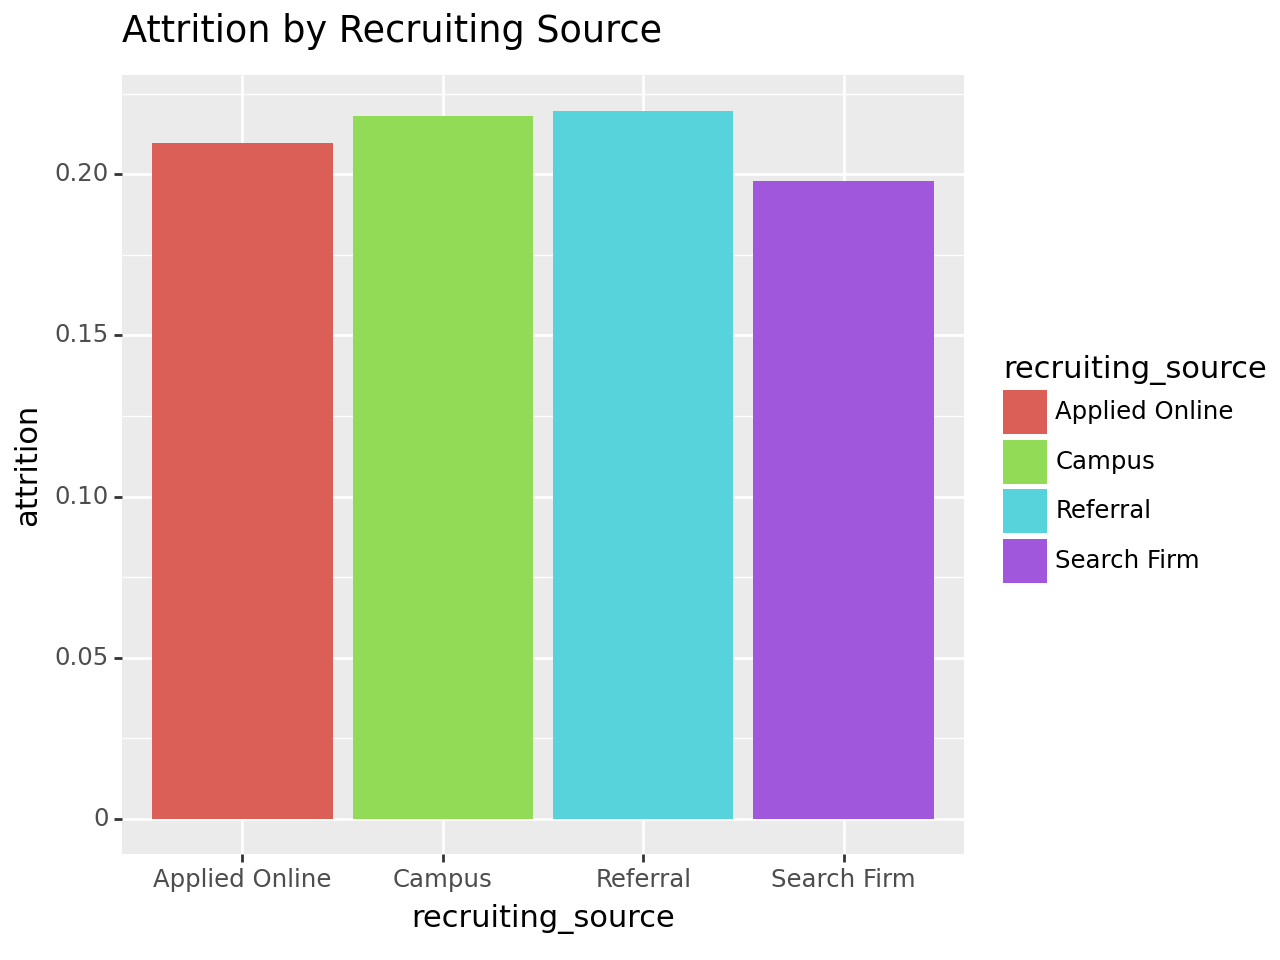

<Figure Size: (640 x 480)>

In [ ]:
(
    ggplot(df_groupby_attrition.reset_index())
    + aes(x='recruiting_source', y='attrition', fill='recruiting_source')
    + geom_col()
    + ggtitle('Attrition by Recruiting Source')
)

#ML:

In [ ]:
df_ohe = pd.get_dummies(df2, columns=['recruiting_source'])
df_ohe.columns

Index(['attrition', 'performance_rating', 'sales_quota_pct',
       'recruiting_source_Applied Online', 'recruiting_source_Campus',
       'recruiting_source_Referral', 'recruiting_source_Search Firm'],
      dtype='object')

In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19361 entries, 0 to 35710
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   attrition                         19361 non-null  float64
 1   performance_rating                19361 non-null  float64
 2   sales_quota_pct                   19361 non-null  float64
 3   recruiting_source_Applied Online  19361 non-null  bool   
 4   recruiting_source_Campus          19361 non-null  bool   
 5   recruiting_source_Referral        19361 non-null  bool   
 6   recruiting_source_Search Firm     19361 non-null  bool   
dtypes: bool(4), float64(3)
memory usage: 680.7 KB


In [ ]:
df_ohe.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source_Applied Online,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm
0,0.000707,2.976686,0.604739,True,False,False,False
2,-0.009998,2.993355,0.206242,True,False,False,False
4,-0.025405,3.016559,0.345470,False,True,False,False
5,0.011349,2.007761,0.319642,True,False,False,False
8,-0.019990,2.993574,0.724944,False,False,True,False


In [ ]:
df_ohe['attrition'] = df_ohe['attrition'].apply(lambda x: 1 if x >= 0 else 0)

In [ ]:
df_ohe.head()

,attrition,performance_rating,sales_quota_pct,recruiting_source_Applied Online,recruiting_source_Campus,recruiting_source_Referral,recruiting_source_Search Firm
0,1,2.976686,0.604739,True,False,False,False
2,0,2.993355,0.206242,True,False,False,False
4,0,3.016559,0.345470,False,True,False,False
5,1,2.007761,0.319642,True,False,False,False
8,0,2.993574,0.724944,False,False,True,False


# spliiting in x and y

In [ ]:
X_train=df_ohe.drop(['attrition', 'recruiting_source_Applied Online', 'recruiting_source_Campus', 'recruiting_source_Referral', 'recruiting_source_Search Firm'], axis=1)
y_train= df_ohe['attrition']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
lr = LogisticRegression()

In [ ]:
lr.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred=lr.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.62
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1459
           1       0.62      1.00      0.77      2414

    accuracy                           0.62      3873
   macro avg       0.31      0.50      0.38      3873
weighted avg       0.39      0.62      0.48      3873

[[   0 1459]
 [   0 2414]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.


# SVM (Support Vector Machine)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc = SVC(class_weight='balanced',random_state=7)

In [ ]:
svc.fit(X_train,y_train)

SVC(class_weight='balanced', random_state=7)

In [ ]:
Y_pred1 = svc.predict(X_test)

In [ ]:
Y_pred1.shape ,y_test.shape

((3873,), (3873,))

In [ ]:
print(classification_report(Y_pred1,y_test))

              precision    recall  f1-score   support

           0       0.68      0.40      0.50      2508
           1       0.37      0.66      0.48      1365

    accuracy                           0.49      3873
   macro avg       0.53      0.53      0.49      3873
weighted avg       0.57      0.49      0.49      3873



## Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB , MultinomialNB, BernoulliNB

In [ ]:
s1 = GaussianNB()

In [ ]:
s1.fit(X_train,y_train)

GaussianNB()

In [ ]:
Y_pred2 = s1.predict(X_test)

In [ ]:
Y_pred2.shape ,y_test.shape

((3873,), (3873,))

In [ ]:
print(classification_report(Y_pred2,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77      3873

    accuracy                           0.62      3873
   macro avg       0.50      0.31      0.38      3873
weighted avg       1.00      0.62      0.77      3873



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.


In [ ]:
s2 = BernoulliNB()

In [ ]:
s2.fit(X_train,y_train)

BernoulliNB()

In [ ]:
s2.predict(X_test)

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
s2.score(X_test,y_test)

0.6232894397108185

In [ ]:
print(classification_report(s2.predict(X_test),y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.77      3873

    accuracy                           0.62      3873
   macro avg       0.50      0.31      0.38      3873
weighted avg       1.00      0.62      0.77      3873



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
